**Task_no_01**

Sales Forecast - MSE: 5678918601.24677
Sales Forecast - R-squared: -25.84713285930597


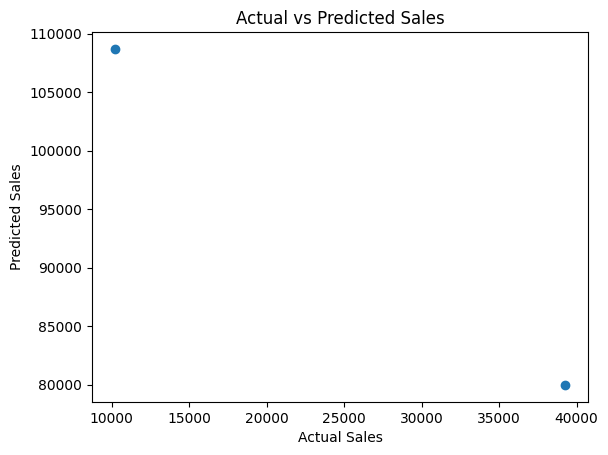

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the data for the code
data_sales = pd.DataFrame({
    'ad_budget': np.random.randint(1000, 10000, 10),
    'discount_rate': np.random.uniform(0, 50, 10),
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Autumn'], 10),
    'store_traffic': np.random.randint(100, 1000, 10),
    'sales': np.random.randint(5000, 50000, 10)
})

# Encode 'season' using one-hot encoding
data_sales = pd.get_dummies(data_sales, columns=['season'], drop_first=True)

# Splitting into features and target variable
X_sales = data_sales.drop(columns=['sales'])
y_sales = data_sales['sales']

# Splitting into train and test sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Training the model and predicting the sales
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)
y_pred_sales = model_sales.predict(X_test_sales)

# Calculating the error values
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

# Plotting the predicted values against the actual values
plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Task_no_02:

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Load dataset
url = 'https://raw.githubusercontent.com/mohitgupta-1O1/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'
df = pd.read_csv(url, encoding='latin-1')
df = df.iloc[:, :-3]
df.columns = ["label", "message"]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
for msg in df['message']:
  msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
  msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
  corpus.append(" ".join(msg))
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['label'].values
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.97847533632287


**Task_no_03**

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Load dataset
df =pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
# Reduce dataset size for faster processing
df = df.sample(frac=0.1, random_state=42)
# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9989468141126909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Task_no_04**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Load dataset
url = 'https://raw.githubusercontent.com/albayraktaroglu/Datasets/master/churn.csv'
df = pd.read_csv(url)
df.head()
# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = label_enc.fit_transform(df[col])
# Define features and target variable
X = df.drop(columns=['Churn?'])
y = df['Churn?']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
# Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9190404797601199
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.90      0.52      0.66       101

    accuracy                           0.92       667
   macro avg       0.91      0.76      0.81       667
weighted avg       0.92      0.92      0.91       667

